# Proyek analisis data : Bike Sharing Dataset
- **Nama:** Nizham Aufar
- **Email:** nizham.aufar.tik23@stu.pnj.ac.id
- **ID Dicoding:** nizhamaufarstupnj

## Menentukan Pertanyaan Bisnis

- 1 Bagaimana Pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?
- 2 Bagaimana pola penyewaan di hari kerja vs hari libur berdasarkan jam nya
- 3 Bagaimana Perbedaan Pola Penyewaan Sepeda antara Pengguna Kasual dan Pengguna terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
df_Day = pd.read_csv('day.csv')
df_Hour = pd.read_csv('hour.csv')

**Insight:**
- Data diambil dari drive dicoding pada link berikut [Drive](https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view) yang merupakan hasil modifikasi dari dataset resmi di [Kaggle ](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

- terdapat 2 file csv hasil aggreagasi yaitu day.csv dan hour.csv
- Data berasal dari Capital Bikeshare - washington D.C

### Assessing Data

In [3]:
df_Day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
df_Hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
df_Hour.describe()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_workingday,weather_condition,temperature_celsius,feels_like_temperature_celsius,humidity_percentage,windspeed_kmh,casual_users,registered_users,total_users,year_label
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088,2011.502561
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000,2011.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000,2012.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000,2012.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592511,19.292983,8.196795,49.305030,151.357286,181.387599,0.500008


In [15]:
df_Day.describe()

,instant,date,season,year,month,is_holiday,day_of_week,is_workingday,weather_condition,temperature_celsius,feels_like_temperature_celsius,humidity_percentage,windspeed_kmh,casual_users,registered_users,total_users,year_label
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837,2011.500684
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000,2011.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000,2011.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000,2012.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000,2012.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000,2012.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452,0.500342


**Insight:** (Day.csv)
- terdapat 731 baris
- tedapat 16 kolom
- tidak ada kolom null
- tidak ada kolom duplicated

**Insight:** (Hour.csv)
- terdapat 17379 baris
- tedapat 16 kolom
- tidak ada kolom null
- tidak ada kolom duplicated

### Cleaning Data

In [5]:
df_Day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# RENAME DATASET'S COLUMNS

df_Day.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'holiday':'is_holiday',
    'weekday':'day_of_week',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'temp':'temperature_celsius',
    'atemp':'feels_like_temperature_celsius',
    'hum':'humidity_percentage',
    'windspeed':'windspeed_kmh',
    'casual':'casual_users',
    'registered':'registered_users',
    'cnt':'total_users'
}, inplace=True)

In [7]:
# RENAME DATASET'S COLUMNS

df_Hour.rename(columns={
    'dteday':'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'holiday':'is_holiday',
    'weekday':'day_of_week',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'temp':'temperature_celsius',
    'atemp':'feels_like_temperature_celsius',
    'hum':'humidity_percentage',
    'windspeed':'windspeed_kmh',
    'casual':'casual_users',
    'registered':'registered_users',
    'cnt':'total_users'
}, inplace=True)

In [8]:
# SCALING BACK THE FEATURES TO ORIGINAL VALUE
df_Day['temperature_celsius'] = df_Day['temperature_celsius'] * 41
df_Day['feels_like_temperature_celsius'] = df_Day['feels_like_temperature_celsius'] * 50
df_Day['humidity_percentage'] = df_Day['humidity_percentage'] * 100
df_Day['windspeed_kmh'] = df_Day['windspeed_kmh'] * 67

In [9]:
# SCALING BACK THE FEATURES TO ORIGINAL VALUE
df_Hour['temperature_celsius'] = df_Hour['temperature_celsius'] * 41
df_Hour['feels_like_temperature_celsius'] = df_Hour['feels_like_temperature_celsius'] * 50
df_Hour['humidity_percentage'] = df_Hour['humidity_percentage'] * 100
df_Hour['windspeed_kmh'] = df_Hour['windspeed_kmh'] * 67

In [10]:
# Mapping Season
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df_Day['season_label'] = df_Day['season'].map(season_map)
df_Hour['season_label'] = df_Hour['season'].map(season_map)

In [11]:
# Mapping Weather
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
}

df_Day['weather_label'] = df_Day['weather_condition'].map(weather_map)
df_Hour['weather_label'] = df_Hour['weather_condition'].map(weather_map)

In [12]:
# Convert 'date' column to datetime type
df_Hour['date'] = pd.to_datetime(df_Hour['date'])
df_Day['date'] = pd.to_datetime(df_Day['date'])

In [13]:
df_Day['year_label'] = df_Day['year'].map({0: 2011, 1: 2012})
df_Hour['year_label'] = df_Hour['year'].map({0: 2011, 1: 2012})


**Insight:**
- Mengubah nama beberapa colom agar lebih informatif
- Mengubah tipe data dtime dari objek ke datetime
- Mapping weather agar lebih informatif
- Mapping season agar lebih informatif
- Scalling beberapa fitur ke angka original agar lebih mudah di explain dan lebih informatif

## Exploratory Data Analysis (EDA)

### Explore Data Analysis

In [24]:
season_agg = df_Day.groupby(by="season_label").agg({
    "total_users": ["mean", "max", "min", "std"]
})
print(season_agg)

print("\n--- Aggregasi Jumlah Pengguna Berdasarkan Cuaca ---")
weather_agg = df_Day.groupby(by="weather_label").agg({
    "total_users": ["mean", "max", "min", "std"]
})
print(weather_agg)

              total_users                         
                     mean   max   min          std
season_label                                      
Fall          5644.303191  8714  1115  1459.800381
Spring        2604.132597  7836   431  1399.942119
Summer        4992.331522  8362   795  1695.977235
Winter        4728.162921  8555    22  1699.615261

--- Aggregasi Jumlah Pengguna Berdasarkan Cuaca ---
                     total_users                        
                            mean   max  min          std
weather_label                                           
Clear/Partly Cloudy  4876.786177  8714  431  1879.483989
Light Snow/Rain      1803.285714  4639   22  1240.284449
Mist/Cloudy          4035.862348  8362  605  1809.109918


In [26]:
print("\n--- Aggregasi Pengguna per Jam (Hari Kerja vs Libur) ---")
hourly_agg = df_Hour.groupby(['hour', 'is_workingday']).agg({
    "total_users": ["mean"]
}).reset_index()

print(hourly_agg[hourly_agg['hour'].isin([8, 17])])


--- Aggregasi Pengguna per Jam (Hari Kerja vs Libur) ---
   hour is_workingday total_users
                             mean
16    8             0  105.653680
17    8             1  477.006048
34   17             0  323.549784
35   17             1  525.290581


In [27]:
print("\n--- Aggregasi Casual vs Registered per Hari ---")
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_Day['day_name'] = df_Day['date'].dt.day_name()

user_type_agg = df_Day.groupby('day_name').agg({
    "casual_users": "mean",
    "registered_users": "mean",
    "total_users": "mean"
}).reindex(day_order)

print(user_type_agg)


--- Aggregasi Casual vs Registered per Hari ---
           casual_users  registered_users  total_users
day_name                                              
Monday       674.133333       3663.990476  4338.123810
Tuesday      556.182692       3954.480769  4510.663462
Wednesday    551.144231       3997.394231  4548.538462
Thursday     590.961538       4076.298077  4667.259615
Friday       752.288462       3938.000000  4690.288462
Saturday    1465.257143       3085.285714  4550.542857
Sunday      1338.295238       2890.533333  4228.828571


In [28]:
def categorize_time(hour):
    if 0 <= hour < 6: return 'Night'
    elif 6 <= hour < 12: return 'Morning'
    elif 12 <= hour < 18: return 'Afternoon'
    else: return 'Evening'

df_Hour['time_category'] = df_Hour['hour'].apply(categorize_time)

print("\n--- Aggregasi Berdasarkan Kategori Waktu (Clustering) ---")
time_cluster_agg = df_Hour.groupby('time_category').agg({
    "total_users": ["mean", "sum"]
})
print(time_cluster_agg)


--- Aggregasi Berdasarkan Kategori Waktu (Clustering) ---
              total_users         
                     mean      sum
time_category                     
Afternoon      295.483886  1292742
Evening        225.757555   986109
Morning        208.100688   907319
Night           24.908559   106509


In [17]:
# Cek korelasi variabel numerik
print(df_Day[['temperature_celsius', 'humidity_percentage', 'total_users']].corr())

                     temperature_celsius  humidity_percentage  total_users
temperature_celsius             1.000000             0.126963     0.627494
humidity_percentage             0.126963             1.000000    -0.100659
total_users                     0.627494            -0.100659     1.000000


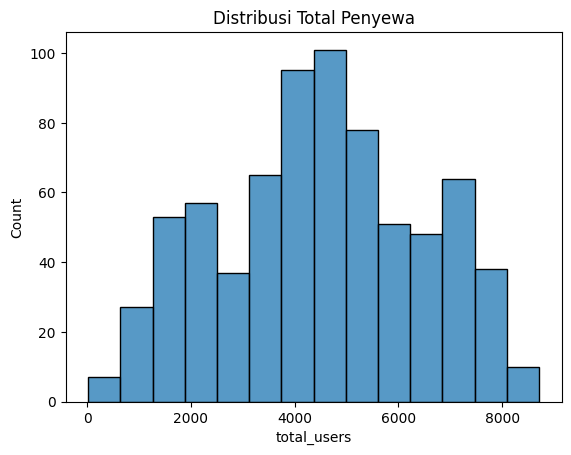

In [19]:
# Liat penyebaran jumlah penyewa
sns.histplot(df_Day['total_users'])
plt.title("Distribusi Total Penyewa")
plt.show()

**Insight:**
- 1. Terlihat rata-rata penyewa tertinggi ada di musim Gugur (Fall) dan cuaca Cerah.
- 2. Membandingkan rata-rata penyewaan per jam, dipisah antara hari kerja dan libur.
- 3. Casual users angkanya melonjak drastis di Saturday & Sunday.
     Registered users angkanya stabil tinggi di Monday-Friday.
     
- Terdapat korelasi positif yang kuat 0.63 antara suhu dan jumlah penyewa. Peningkatan suhu secara signifikan meningkatkan minat orang menyewa sepeda.
- Angin lebih mengganggu dari pada kelembaban bisa dibuktikan dari data dimana angin kencang memiliki korelasi -0.23 yang lebih besar dampaknya dibanding kelembaban (-0.10). jadi Pengguna cenderung menghindari bersepeda saat angin kencang.
- Suhu dan kelembaban tidak saling mempengaruhi secara signifikan, sehingga keduanya harus diperlakukan sebagai variabel terpisah dalam prediksi bisnis.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh Musim dan Cuaca terhadap jumlah penyewa?

/tmp/ipython-input-3274381360.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_label', y='total_users', data=seasonal_stats, ax=ax[0], palette='coolwarm')
/tmp/ipython-input-3274381360.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_label', y='total_users', data=weather_stats, ax=ax[1], palette='viridis')


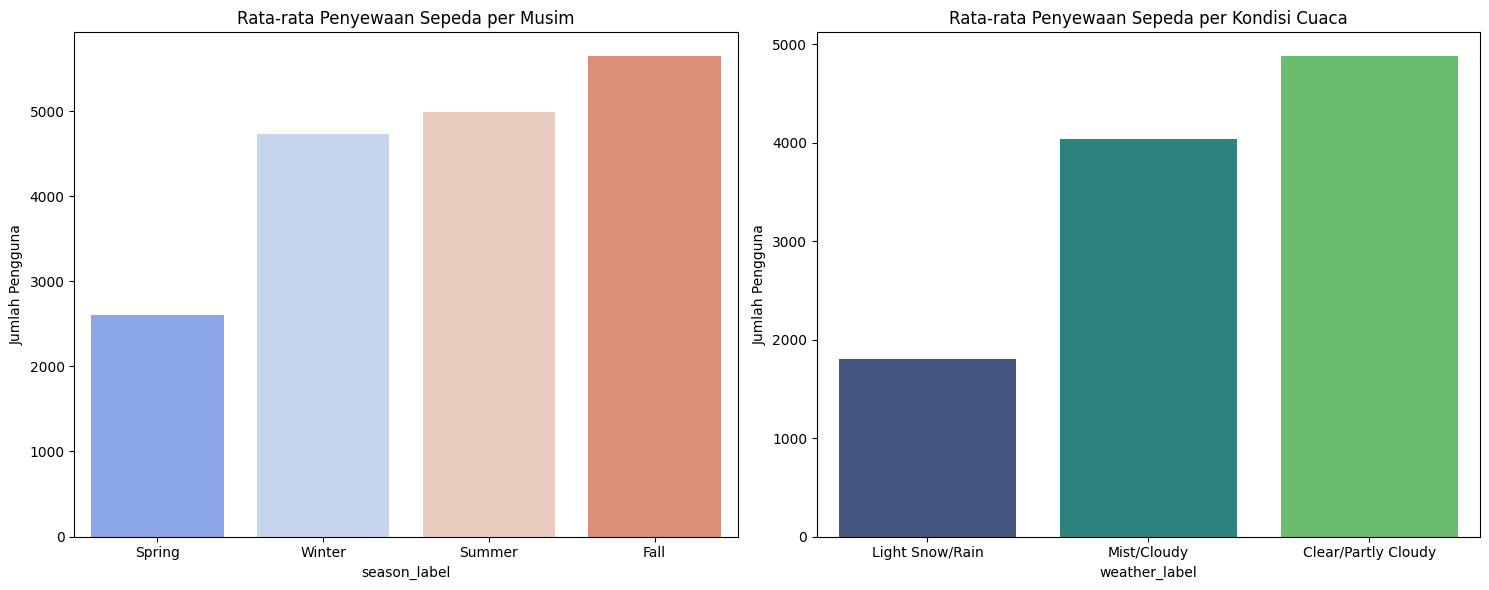

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x='season_label', y='total_users', data=seasonal_stats, ax=ax[0], palette='coolwarm')
ax[0].set_title('Rata-rata Penyewaan Sepeda per Musim')
ax[0].set_ylabel('Jumlah Pengguna')

# Plot Cuaca
sns.barplot(x='weather_label', y='total_users', data=weather_stats, ax=ax[1], palette='viridis')
ax[1].set_title('Rata-rata Penyewaan Sepeda per Kondisi Cuaca')
ax[1].set_ylabel('Jumlah Pengguna')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan di hari kerja vs hari libur berdasarkan jam nya ?

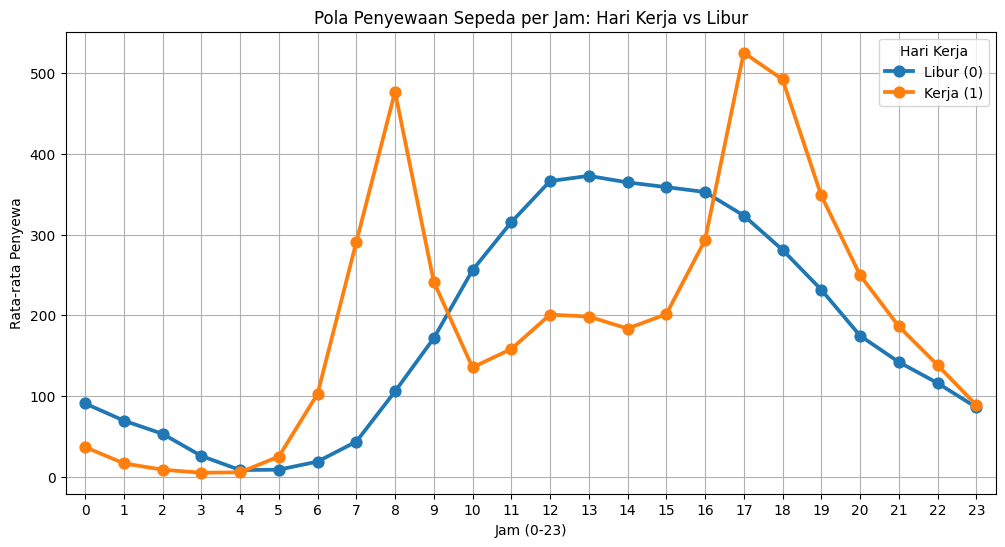

In [21]:
plt.figure(figsize=(12, 6))

sns.pointplot(x='hour', y='total_users', hue='is_workingday', data=df_Hour, errorbar=None)

plt.title('Pola Penyewaan Sepeda per Jam: Hari Kerja vs Libur')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Penyewa')
plt.legend(title='Hari Kerja', labels=['Libur (0)', 'Kerja (1)'])
plt.grid(True)
plt.show()

### Pertanyaan 3 : Bagaimana pola penyewaan antara pengguna Casual dan Registered berdasarkan hari?

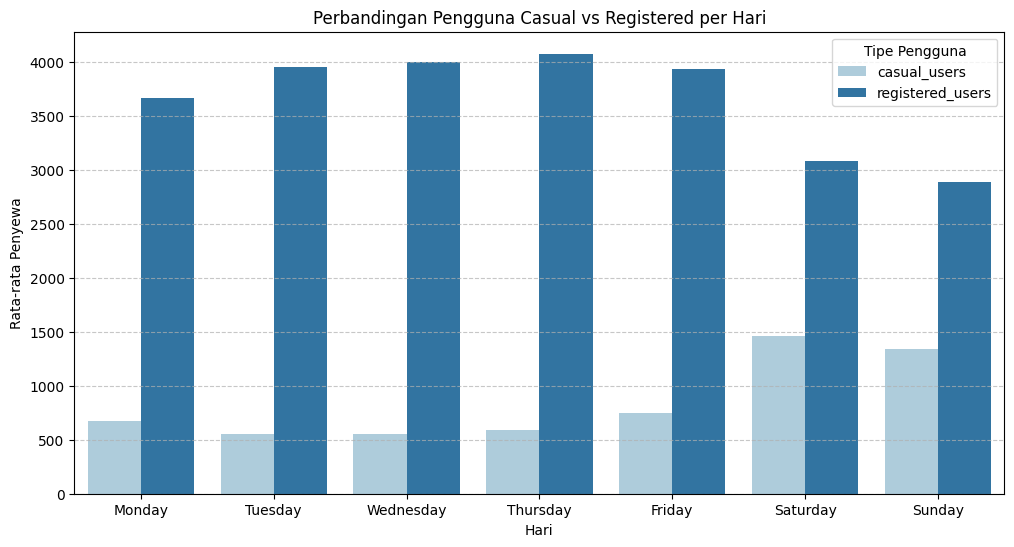

In [22]:
df_Day['day_name'] = df_Day['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

user_type_stats = df_Day.groupby('day_name')[['casual_users', 'registered_users']].mean().reindex(day_order)

plt.figure(figsize=(12, 6))

user_type_melt = user_type_stats.reset_index().melt(id_vars='day_name', var_name='User Type', value_name='Average Rentals')

sns.barplot(x='day_name', y='Average Rentals', hue='User Type', data=user_type_melt, palette='Paired')

plt.title('Perbandingan Pengguna Casual vs Registered per Hari')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewa')
plt.legend(title='Tipe Pengguna')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- 1. Berdasarkan musim, paling banyak adalah fall (musim gugur) dan kalau berdasarkan kondisi cuaca adalah Clear (cuaca carah) atau sedikit berawan

- 2. Hari kerja mempunyai dua puncak yaitu pada jam 8 pagi dan 5 sore yang mana itu adalah jam berangkat dan pulang kerja, untuk hari libur grafik nya cembung pada siang hari (kemungkinan orang jalan jalan).

- 3. Registered User, grafiknya tinggi pada weekday dan turun pada weekend yang menandakan mereka menggunakan sepeda untuk pergi bekerja atau sekolah, Casual user, berbanding kebalik dengan registered user, grafik nya melonjak pada weekend walaupun secara overal tidak lebih banyak dari user langganan tapi ini membuktikan ada nya lonjakan pengguna baru untuk sekedar jalan jalan

## Analisis Lanjutan (Opsional)

/tmp/ipython-input-1383685483.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_of_day', y='total_users', data=time_stats, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='magma')


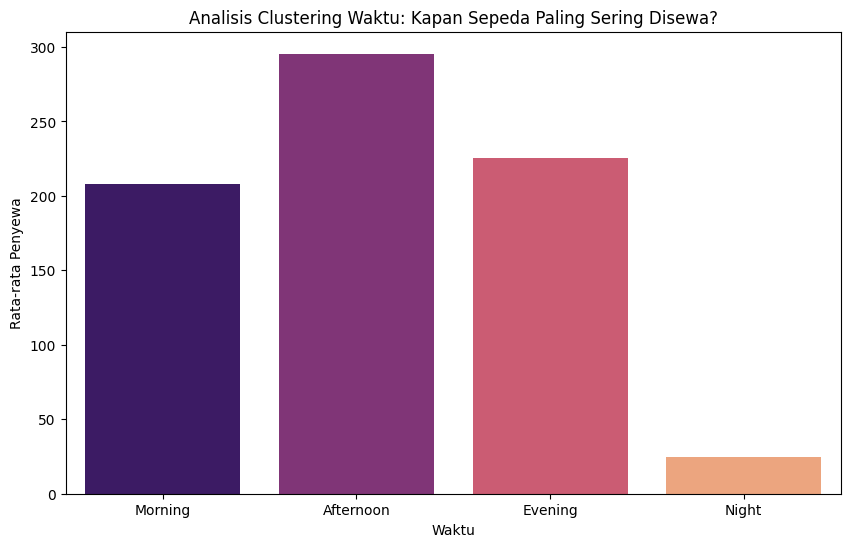

In [23]:
def categorize_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_Hour['time_of_day'] = df_Hour['hour'].apply(categorize_time_of_day)

# Cek performa tiap kategori waktu
time_stats = df_Hour.groupby('time_of_day')[['total_users']].mean().reset_index()

# Visualisasi Clustering
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_day', y='total_users', data=time_stats, order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='magma')
plt.title('Analisis Clustering Waktu: Kapan Sepeda Paling Sering Disewa?')
plt.xlabel('Waktu')
plt.ylabel('Rata-rata Penyewa')
plt.show()

## Conclusion

### Conclusion Pertanyaan 1: Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?
- Faktor Musim: Musim Gugur atau Fall menjadi periode dengan penyewaan sepeda tertinggi, diikuti oleh Musim Summer. Sebaliknya, Spring memiliki tingkat penyewaan terendah.
- Faktor Cuaca: Kondisi cuaca memiliki dampak signifikan. Penyewaan terbanyak terjadi saat Cuaca Cerah/Sedikit Berawan . Penurunan drastis terjadi saat cuaca buruk Hujan/Salju.
- Korelasi Suhu: Terdapat korelasi positif yang kuat antara suhu temp  dan jumlah pengguna. Semakin hangat suhu, semakin banyak orang yang menyewa sepeda.

### Conclusion Pertanyaan 2: Bagaimana pola penyewaan di hari kerja vs hari libur berdasarkan jam-nya?
- Hari Kerja Working Day: Terbentuk pola Bimodal dua puncak, yaitu pada jam 08:00 pagi dan 17:00 sore. Ini mengindikasikan sepeda digunakan sebagai moda transportasi untuk berangkat dan pulang kerja/sekolah.
- Hari Libur Weekend: Pola penyewaan lebih landai di siang hari, sekitar jam 12:00 - 15:00. Ini menunjukkan penggunaan sepeda lebih bertujuan untuk rekreasi atau olahraga santai.

### Conclusion Pertanyaan 3: Bagaimana perbedaan pola penyewaan antara Pengguna Casual dan Registered?
- Registered Users (Member): Mendominasi penyewaan pada hari Senin - Jumat. Aktivitas mereka sangat konsisten dan mengikuti jam kerja, membuktikan bahwa mereka adalah pengguna loyal yang mengandalkan sepeda untuk rutinitas harian.
- Casual Users (Non-Member): Jumlah penyewaan melonjak drastis pada akhir pekan Sabtu & Minggu. Ini mengonfirmasi bahwa segmen ini adalah turis atau warga lokal yang menyewa sepeda hanya untuk bersenang-senang di waktu luang.

---